In [3]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torch
import random
import numpy as np

from torch import nn
from torchvision import transforms

def set_seeds(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False  # if you are using CuDNN.
    torch.backends.cudnn.deterministic = True


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
# 1. Get pretrained weights for ViT-Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT 

# 2. Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

# 3. Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False
    
# 4. Change the classifier head 
class_names = ['Asian-Green-Bee-Eater',
  'Brown-Headed-Barbet',
  'Cattle-Egret',
  'Common-Kingfisher',
  'Common-Myna',
  'Common-Rosefinch',
  'Common-Tailorbird',
  'Coppersmith-Barbet',
  'Forest-Wagtail',
  'Gray-Wagtail',
  'Hoopoe',
  'House-Crow',
  'Indian-Grey-Hornbill',
  'Indian-Peacock',
  'Indian-Pitta',
  'Indian-Roller',
  'Jungle-Babbler',
  'Northern-Lapwing',
  'Red-Wattled-Lapwing',
  'Ruddy-Shelduck',
  'Rufous-Treepie',
  'Sarus-Crane',
  'White-Breasted-Kingfisher',
  'White-Breasted-Waterhen',
  'White-Wagtail']

set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

In [7]:
from torchinfo import summary

# Print a summary using torchinfo (uncomment for actual output)
summary(model=pretrained_vit, 
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

C:\Users\singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\activation.py:1196: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  return torch._native_multi_head_attention(


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 25]             768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

In [8]:
# Setup directory paths to train and test images
train_dir = 'C:/Users/singh/Downloads/Bird/Birds_25/train'
test_dir = 'C:/Users/singh/Downloads/Bird/Birds_25/valid'

In [9]:
# Get automatic transforms from pretrained ViT weights
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [10]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str, 
    test_dir: str, 
    transform: transforms.Compose, 
    batch_size: int, 
    num_workers: int=NUM_WORKERS
):

  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

In [11]:
# Setup dataloaders
train_dataloader_pretrained, test_dataloader_pretrained, class_names = create_dataloaders(train_dir=train_dir, test_dir=test_dir, transform=pretrained_vit_transforms, batch_size=32)

Epoch 1/10, Train Loss: 0.0038, Train Accuracy: 99.98%, Test Loss: 0.0726, Test Accuracy: 98.08%


Epoch 2/10, Train Loss: 0.0027, Train Accuracy: 99.98%, Test Loss: 0.0746, Test Accuracy: 98.05%


Epoch 3/10, Train Loss: 0.0021, Train Accuracy: 100.00%, Test Loss: 0.0763, Test Accuracy: 98.09%


Epoch 4/10, Train Loss: 0.0018, Train Accuracy: 100.00%, Test Loss: 0.0759, Test Accuracy: 98.13%


Epoch 5/10, Train Loss: 0.0014, Train Accuracy: 100.00%, Test Loss: 0.0802, Test Accuracy: 98.15%


Epoch 6/10, Train Loss: 0.0012, Train Accuracy: 100.00%, Test Loss: 0.0782, Test Accuracy: 98.16%


Epoch 7/10, Train Loss: 0.0011, Train Accuracy: 100.00%, Test Loss: 0.0786, Test Accuracy: 98.21%


Epoch 8/10, Train Loss: 0.0009, Train Accuracy: 100.00%, Test Loss: 0.0804, Test Accuracy: 98.07%


Epoch 9/10, Train Loss: 0.0007, Train Accuracy: 100.00%, Test Loss: 0.0824, Test Accuracy: 98.03%


Epoch 10/10, Train Loss: 0.0007, Train Accuracy: 100.00%, Test Loss: 0.0850, Test Accuracy: 98.09%


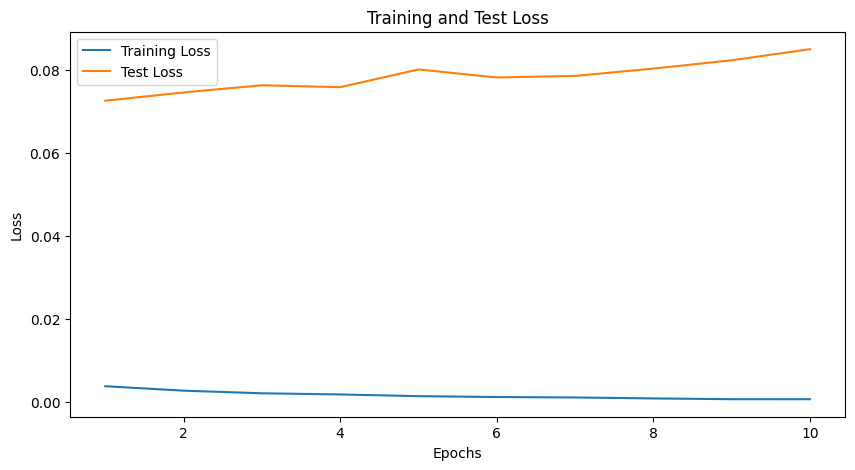

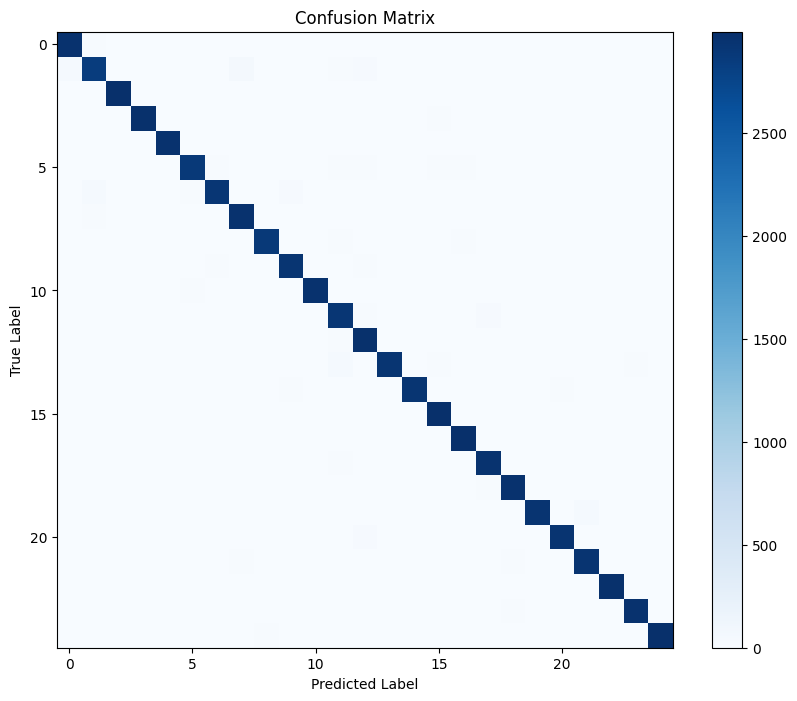

In [21]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for progress bar
from sklearn.metrics import confusion_matrix

# Define train function
def train(model, train_loader, test_loader, optimizer, loss_fn, epochs, device):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    all_predictions = []
    all_targets = []
    
    for epoch in range(epochs):
        model.train()  # Set model to train mode
        train_loss = 0.0
        correct = 0
        total = 0
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}', leave=False, position=0, dynamic_ncols=True)
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = loss_fn(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights
            train_loss += loss.item() * images.size(0)  # Accumulate loss
            _, predicted = outputs.max(1)  # Get the predicted class with highest probability
            total += labels.size(0)  # Accumulate the number of images
            correct += predicted.eq(labels).sum().item()  # Accumulate the number of correct predictions
            # Update progress bar description
            progress_bar.set_postfix({'loss': train_loss / total, 'accuracy': 100. * correct / total})

        # Compute training loss and accuracy
        train_loss /= len(train_loader.dataset)
        train_accuracy = 100. * correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluate the model on the test set
        model.eval()  # Set model to evaluation mode
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)  # Forward pass
                loss = loss_fn(outputs, labels)  # Compute loss
                test_loss += loss.item() * images.size(0)  # Accumulate loss
                _, predicted = outputs.max(1)  # Get the predicted class with highest probability
                total += labels.size(0)  # Accumulate the number of images
                correct += predicted.eq(labels).sum().item()  # Accumulate the number of correct predictions
                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(labels.cpu().numpy())

        # Compute test loss and accuracy
        test_loss /= len(test_loader.dataset)
        test_accuracy = 100. * correct / total
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        # Print test metrics after each epoch
        print(f'Epoch {epoch+1}/{epochs}, '
              f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

    # Plot training and test loss graph
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()
    plt.show()

    # Generate confusion matrix
    conf_matrix = confusion_matrix(all_targets, all_predictions)
    plt.figure(figsize=(10, 8))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return train_losses, test_losses, train_accuracies, test_accuracies

# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of the pretrained ViT feature extractor model
train_losses, test_losses, train_accuracies, test_accuracies = train(model=pretrained_vit,
                                                                      train_loader=train_dataloader_pretrained,
                                                                      test_loader=test_dataloader_pretrained,
                                                                      optimizer=optimizer,
                                                                      loss_fn=loss_fn,
                                                                      epochs=10,
                                                                      device=device)


In [22]:
import torch
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate the model on the validation set
def evaluate_model(model, dataloader, device):
    model.eval()
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    return all_predictions, all_targets

# Get predictions and targets
predictions, targets = evaluate_model(pretrained_vit, test_dataloader_pretrained, device)

# Calculate average accuracy
avg_accuracy = accuracy_score(targets, predictions)

# Calculate class-wise accuracy
classwise_accuracy = {}
for i in range(len(test_dataloader_pretrained.dataset.classes)):
    class_name = test_dataloader_pretrained.dataset.classes[i]
    class_predictions = [p for p, t in zip(predictions, targets) if t == i]
    class_targets = [t for t in targets if t == i]
    class_accuracy = accuracy_score(class_targets, class_predictions)
    classwise_accuracy[class_name] = class_accuracy

# Generate confusion matrix
conf_matrix = confusion_matrix(targets, predictions)

# Print the metrics
print("Average Accuracy:", avg_accuracy)
print("Class-wise Accuracy:")
for class_name, acc in classwise_accuracy.items():
    print(f"{class_name}: {acc}")
print("Confusion Matrix:")
print(conf_matrix)


Average Accuracy: 0.9809333333333333
Class-wise Accuracy:
Asian-Green-Bee-Eater: 0.9833333333333333
Brown-Headed-Barbet: 0.95
Cattle-Egret: 0.9966666666666667
Common-Kingfisher: 0.9933333333333333
Common-Myna: 0.9866666666666667
Common-Rosefinch: 0.95
Common-Tailorbird: 0.9666666666666667
Coppersmith-Barbet: 0.9866666666666667
Forest-Wagtail: 0.9633333333333334
Gray-Wagtail: 0.98
Hoopoe: 0.9933333333333333
House-Crow: 0.97
Indian-Grey-Hornbill: 0.9933333333333333
Indian-Peacock: 0.9733333333333334
Indian-Pitta: 0.97
Indian-Roller: 0.9966666666666667
Jungle-Babbler: 0.9966666666666667
Northern-Lapwing: 0.99
Red-Wattled-Lapwing: 0.98
Ruddy-Shelduck: 0.98
Rufous-Treepie: 0.9733333333333334
Sarus-Crane: 0.9766666666666667
White-Breasted-Kingfisher: 0.99
White-Breasted-Waterhen: 0.99
White-Wagtail: 0.9933333333333333
Confusion Matrix:
[[295   2   0   0   0   1   1   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  3 285   0   0   1   0   0   6   0   0   0   2   3

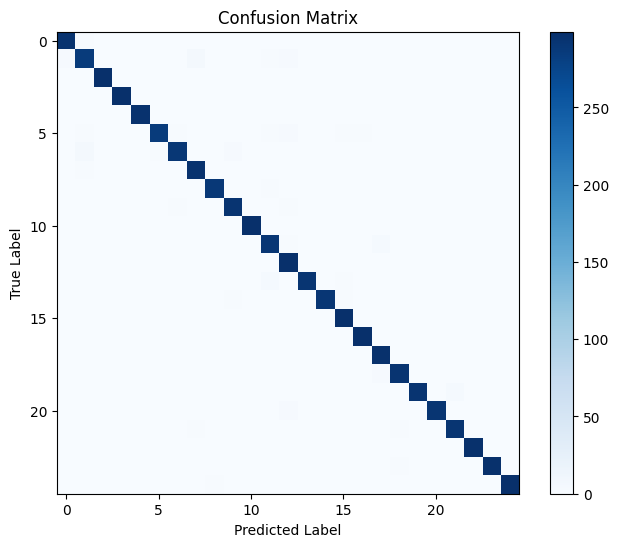

In [23]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

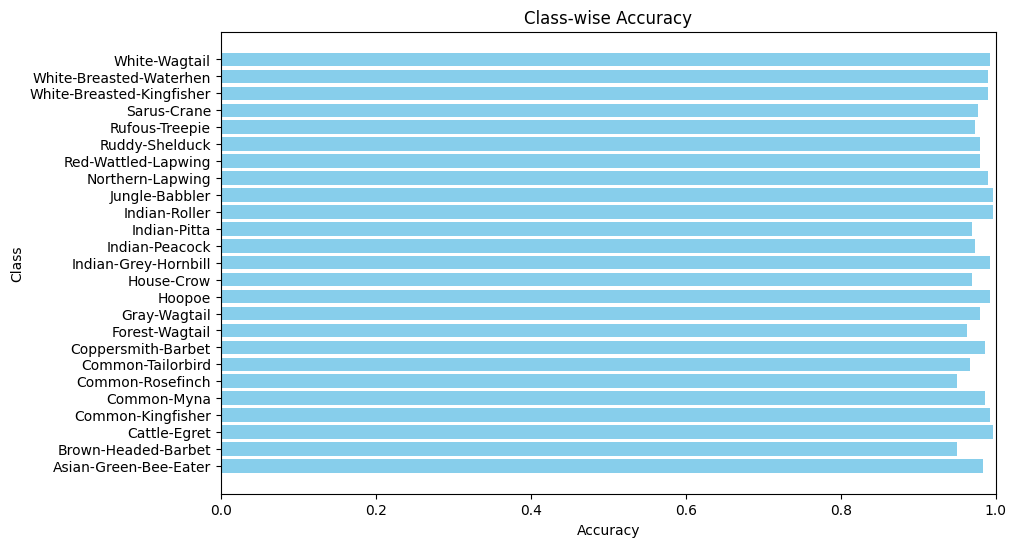

In [24]:
# Plotting class-wise accuracy
plt.figure(figsize=(10, 6))
class_names = list(classwise_accuracy.keys())
class_acc = list(classwise_accuracy.values())
plt.barh(class_names, class_acc, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Class')
plt.title('Class-wise Accuracy')
plt.xlim(0, 1)
plt.show()

In [26]:
# To generate a YAML configuration file

import yaml

# Define the configuration dictionary
config = {
    'pretrained_vit_weights': 'DEFAULT',
    'transformer_model': 'vit_b_16',
    'classifier_head': {
        'in_features': 768,
        'out_features': 25  # Assuming you have 25 classes
    },
    'optimizer': {
        'name': 'Adam',
        'lr': 1e-3
    },
    'loss_function': 'CrossEntropyLoss',
    'training_parameters': {
        'epochs': 10,
        'batch_size': 32,
        'num_workers': os.cpu_count(),
        'device': 'cuda' if torch.cuda.is_available() else 'cpu'
    }
}

# Write the configuration dictionary to a YAML file
with open('config.yaml', 'w') as file:
    yaml.dump(config, file)

print("Configuration saved to 'config.yaml'")


Configuration saved to 'config.yaml'


In [27]:
# To save the weights of the trained model

# Save the state dictionary of the trained model
torch.save(pretrained_vit.state_dict(), 'pretrained_vit_trained_weights.pth')

print("Trained model weights saved to 'pretrained_vit_trained_weights.pth'")


Trained model weights saved to 'pretrained_vit_trained_weights.pth'
